## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
data.head()
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
data['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = data[['Mouse ID', 'Timepoint']].value_counts()
dupes

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [4]:
clean = data.loc[data['Mouse ID'] != 'g989']
clean[['Mouse ID', 'Timepoint']].value_counts()


Mouse ID  Timepoint
a203      0            1
q610      5            1
q633      25           1
          20           1
          15           1
                      ..
i334      30           1
          25           1
          20           1
          15           1
z969      45           1
Length: 1880, dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agdata = clean[['Drug Regimen', 'Tumor Volume (mm3)']]
agdata = agdata.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).reset_index()
agdata
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean[['Drug Regimen']].value_counts()
# Using the aggregation method, produce the same summary statistics in a single line
statscheck = clean[['Drug Regimen', 'Tumor Volume (mm3)']]
statscheck.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [9]:
mean = statscheck.groupby(['Drug Regimen']).mean()
mean = mean.rename(columns={"Tumor Volume (mm3)": "Mean"})

In [10]:
median = statscheck.groupby(['Drug Regimen']).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median"})

In [11]:
varience = statscheck.groupby(['Drug Regimen']).var()
varience = varience.rename(columns={"Tumor Volume (mm3)": "Variance"})

In [12]:
std = statscheck.groupby(['Drug Regimen']).std()
std = std.rename(columns={"Tumor Volume (mm3)": "Standard Deviation"})

In [13]:
sem = statscheck.groupby(['Drug Regimen']).sem()
sem = sem.rename(columns={"Tumor Volume (mm3)": "Standard Error of Mean"})

In [14]:
sumstats = pd.merge(mean, median, on="Drug Regimen", how="outer")
sumstats = pd.merge(sumstats, varience, on="Drug Regimen", how="outer") 
sumstats = pd.merge(sumstats, std, on="Drug Regimen", how="outer") 
sumstats = pd.merge(sumstats, sem, on="Drug Regimen", how="outer") 
sumstats

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

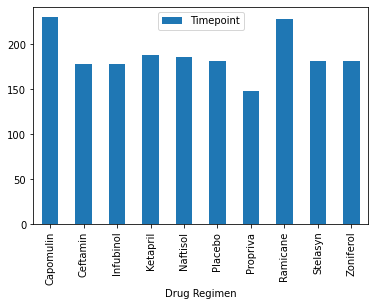

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bardata = clean[['Drug Regimen', 'Timepoint']]
bardatatotal = bardata.groupby(['Drug Regimen']).count()
bardatatotal.plot.bar()

In [16]:
bardatatotal = bardatatotal.reset_index()
bardatatotal 

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [17]:
# Generate a bar plot showing the total number of timepoints for 
#all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(bardatatotal))
tick_locations = [value+0.4 for value in x_axis]


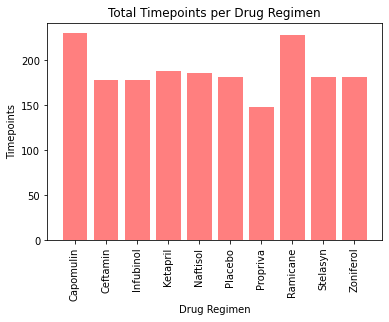

In [18]:
plt.bar(x_axis, bardatatotal['Timepoint'], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, bardatatotal["Drug Regimen"], rotation="vertical")
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
piedata = clean[['Sex']].value_counts()
piedata

Sex   
Male      958
Female    922
dtype: int64

<AxesSubplot:ylabel='None'>

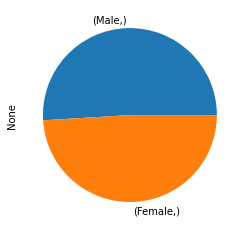

In [20]:
abcd = piedata.plot.pie(y="Mouse ID")
abcd

([<matplotlib.patches.Wedge at 0x1eeb3f02e50>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

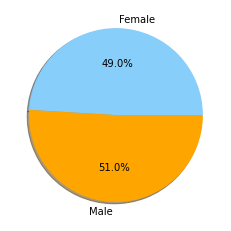

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = [922, 958]
labels = ["Female", "Male"]
colors = ["lightskyblue", "orange"]
plt.pie(sex, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,)


In [22]:
clean['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
newdf = clean[['Mouse ID', 'Timepoint']]
newdf2 = newdf.groupby(['Mouse ID']).max().reset_index()
newdf4 = newdf2.merge(clean, on=['Mouse ID', "Timepoint"])
# Capomulin, Ramicane, Infubinol, and Ceftamin
newdf4
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
drugdrug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumorumor = []


for drug in drugdrug:
    abcd = newdf4.loc[newdf4['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumorumor.append(abcd)
    
    quartiles = abcd.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25] # bottom of the box
    upperq = quartiles[0.75]# top of the box
    iqr = upperq-lowerq # range of values in the box - use to find the ends of the whiskers
    lower_bound = lowerq - (1.5*iqr) # bottom whisker
    upper_bound = upperq + (1.5*iqr) # upper whisker

# Create empty list to fill with tumor vol data (for plotting)




# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

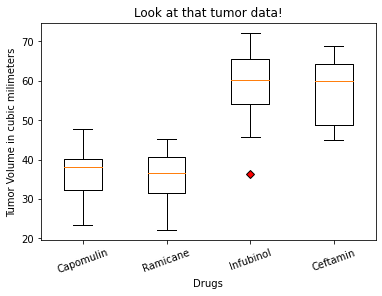

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dot = dict(markerfacecolor='r', marker='D')
plt.boxplot(tumorumor, flierprops=dot)
plt.xlabel('Drugs')
plt.ylabel('Tumor Volume in cubic milimeters')
plt.title("Look at that tumor data!")

plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], rotation=20)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Cubic millimeters')

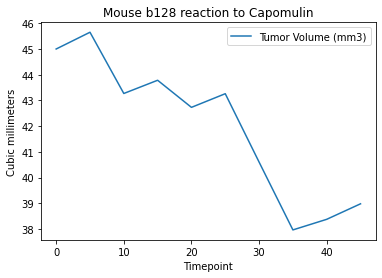

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousey = clean.loc[clean["Mouse ID"] == 'b128']
mousey.plot.line("Timepoint", "Tumor Volume (mm3)")
plt.title("Mouse b128 reaction to Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Cubic millimeters")


In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drugreg = clean.loc[clean["Drug Regimen"] == 'Capomulin']
drugclean = drugreg[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]
drugclean

,Mouse ID,Tumor Volume (mm3),Weight (g)
10,s185,45.000000,17
11,s185,43.878496,17
12,s185,37.614948,17
13,s185,38.177232,17
14,s185,36.866876,17
...,...,...,...
440,i557,47.685963,24
1452,r157,45.000000,25
1453,r157,45.597064,25
1454,r157,46.059608,25


<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

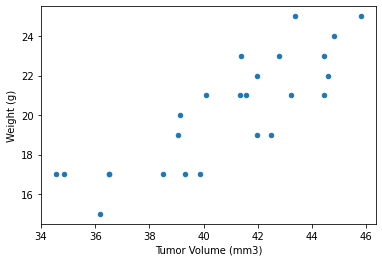

In [28]:
tests = drugclean.groupby(['Mouse ID']).mean()
tests.plot.scatter("Tumor Volume (mm3)", "Weight (g)")


## Correlation and Regression

The correlation coefficient is 0.84


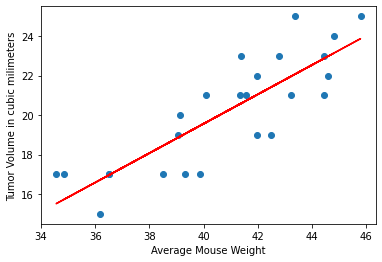

In [29]:
tumor = tests["Tumor Volume (mm3)"]
weight = tests["Weight (g)"]
correlation = st.pearsonr(weight, tumor)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor, weight)
regress_values = tumor * slope + intercept
plt.scatter(tumor,weight)
plt.plot(tumor,regress_values,"r-")
plt.xlabel('Average Mouse Weight')
plt.ylabel('Tumor Volume in cubic milimeters')
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()